In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/大三/下學期/機器學習應用/Datasets/california_housing_train")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering import
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import OrdinalEncoder ,MinMaxScaler ,StandardScaler

# Model import
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
import xgboost as xgb
from xgboost import XGBClassifier ,XGBRegressor
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor
from sklearn.linear_model import LinearRegression ,RANSACRegressor ,Ridge ,Lasso ,ElasticNet

# Evaluate import
from sklearn import metrics
from sklearn.metrics import accuracy_score ,roc_auc_score ,roc_curve ,classification_report ,confusion_matrix
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error ,explained_variance_score

# sns.set(style="whitegrid")
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
plt.rcParams['axes.unicode_minus'] = False # 正常顯示負號

# Load Data

In [33]:
df = pd.read_csv("./california_housing_handled.csv")

df # 20635 rows × 10 columns

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20630    -121.09     39.48                25.0       1665.0           374.0   
20631    -121.21     39.49                18.0        697.0           150.0   
20632    -121.22     39.43                17.0       2254.0           485.0   
20633    -121.32     39.43                18.0       1860.0           409.0   
20634    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0           8.33               45.26   
1          2401.0      1138.0           8.30               35.85   
2           496.0       177.0           7.26               35.21   
3           558.0       219.0           5.64               34.13   
4           565.0       259.0           3.85               34.22   
...           ...         ...            ...                 ...   
20630       845.0       330.0           1.56                7.81   
20631       356.0       114.0           2.56                7.71   
20632      1007.0       433.0           1.70                9.23   
20633       741.0       349.0           1.87                8.47   
20634      1387.0       530.0           2.39                8.94   

       ocean_proximity  
0                  2.0  
1                  2.0  
2                  2.0  
3                  2.0  
4                  2.0  
...                ...  
20630              1.0  
20631              1.0  
20632              1.0  
20633              1.0  
20634              1.0  

[20635 rows x 10 columns]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20635 entries, 0 to 20634
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20635 non-null  float64
 1   latitude            20635 non-null  float64
 2   housing_median_age  20635 non-null  float64
 3   total_rooms         20635 non-null  float64
 4   total_bedrooms      20635 non-null  float64
 5   population          20635 non-null  float64
 6   households          20635 non-null  float64
 7   median_income       20635 non-null  float64
 8   median_house_value  20635 non-null  float64
 9   ocean_proximity     20635 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [35]:
# Numerical statistics
df.describe()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count   20635.00  20635.00            20635.00     20635.00        20635.00   
mean     -119.57     35.63               28.64      2636.02          537.90   
std         2.00      2.14               12.58      2181.79          419.31   
min      -124.35     32.54                1.00         2.00            1.00   
25%      -121.80     33.93               18.00      1448.00          297.00   
50%      -118.50     34.26               29.00      2127.00          438.00   
75%      -118.01     37.71               37.00      3148.00          644.00   
max      -114.31     41.95               52.00     39320.00         6445.00   

       population  households  median_income  median_house_value  \
count    20635.00    20635.00       20635.00            20635.00   
mean      1425.66      499.59           3.87               20.68   
std       1132.53      382.36           1.90               11.54   
min          3.00        1.00           0.50                1.50   
25%        787.00      280.00           2.56               11.96   
50%       1166.00      409.00           3.54               17.97   
75%       1725.00      605.00           4.74               26.47   
max      35682.00     6082.00          15.00               50.00   

       ocean_proximity  
count         20635.00  
mean              0.93  
std               1.03  
min               0.00  
25%               0.00  
50%               1.00  
75%               1.00  
max               3.00

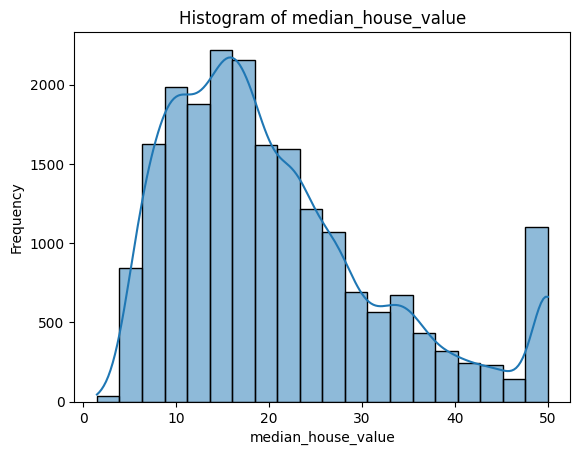

In [36]:
median_house_value = df['median_house_value']

sns.histplot(median_house_value, bins=20, kde=True)
plt.title('Histogram of median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.show()

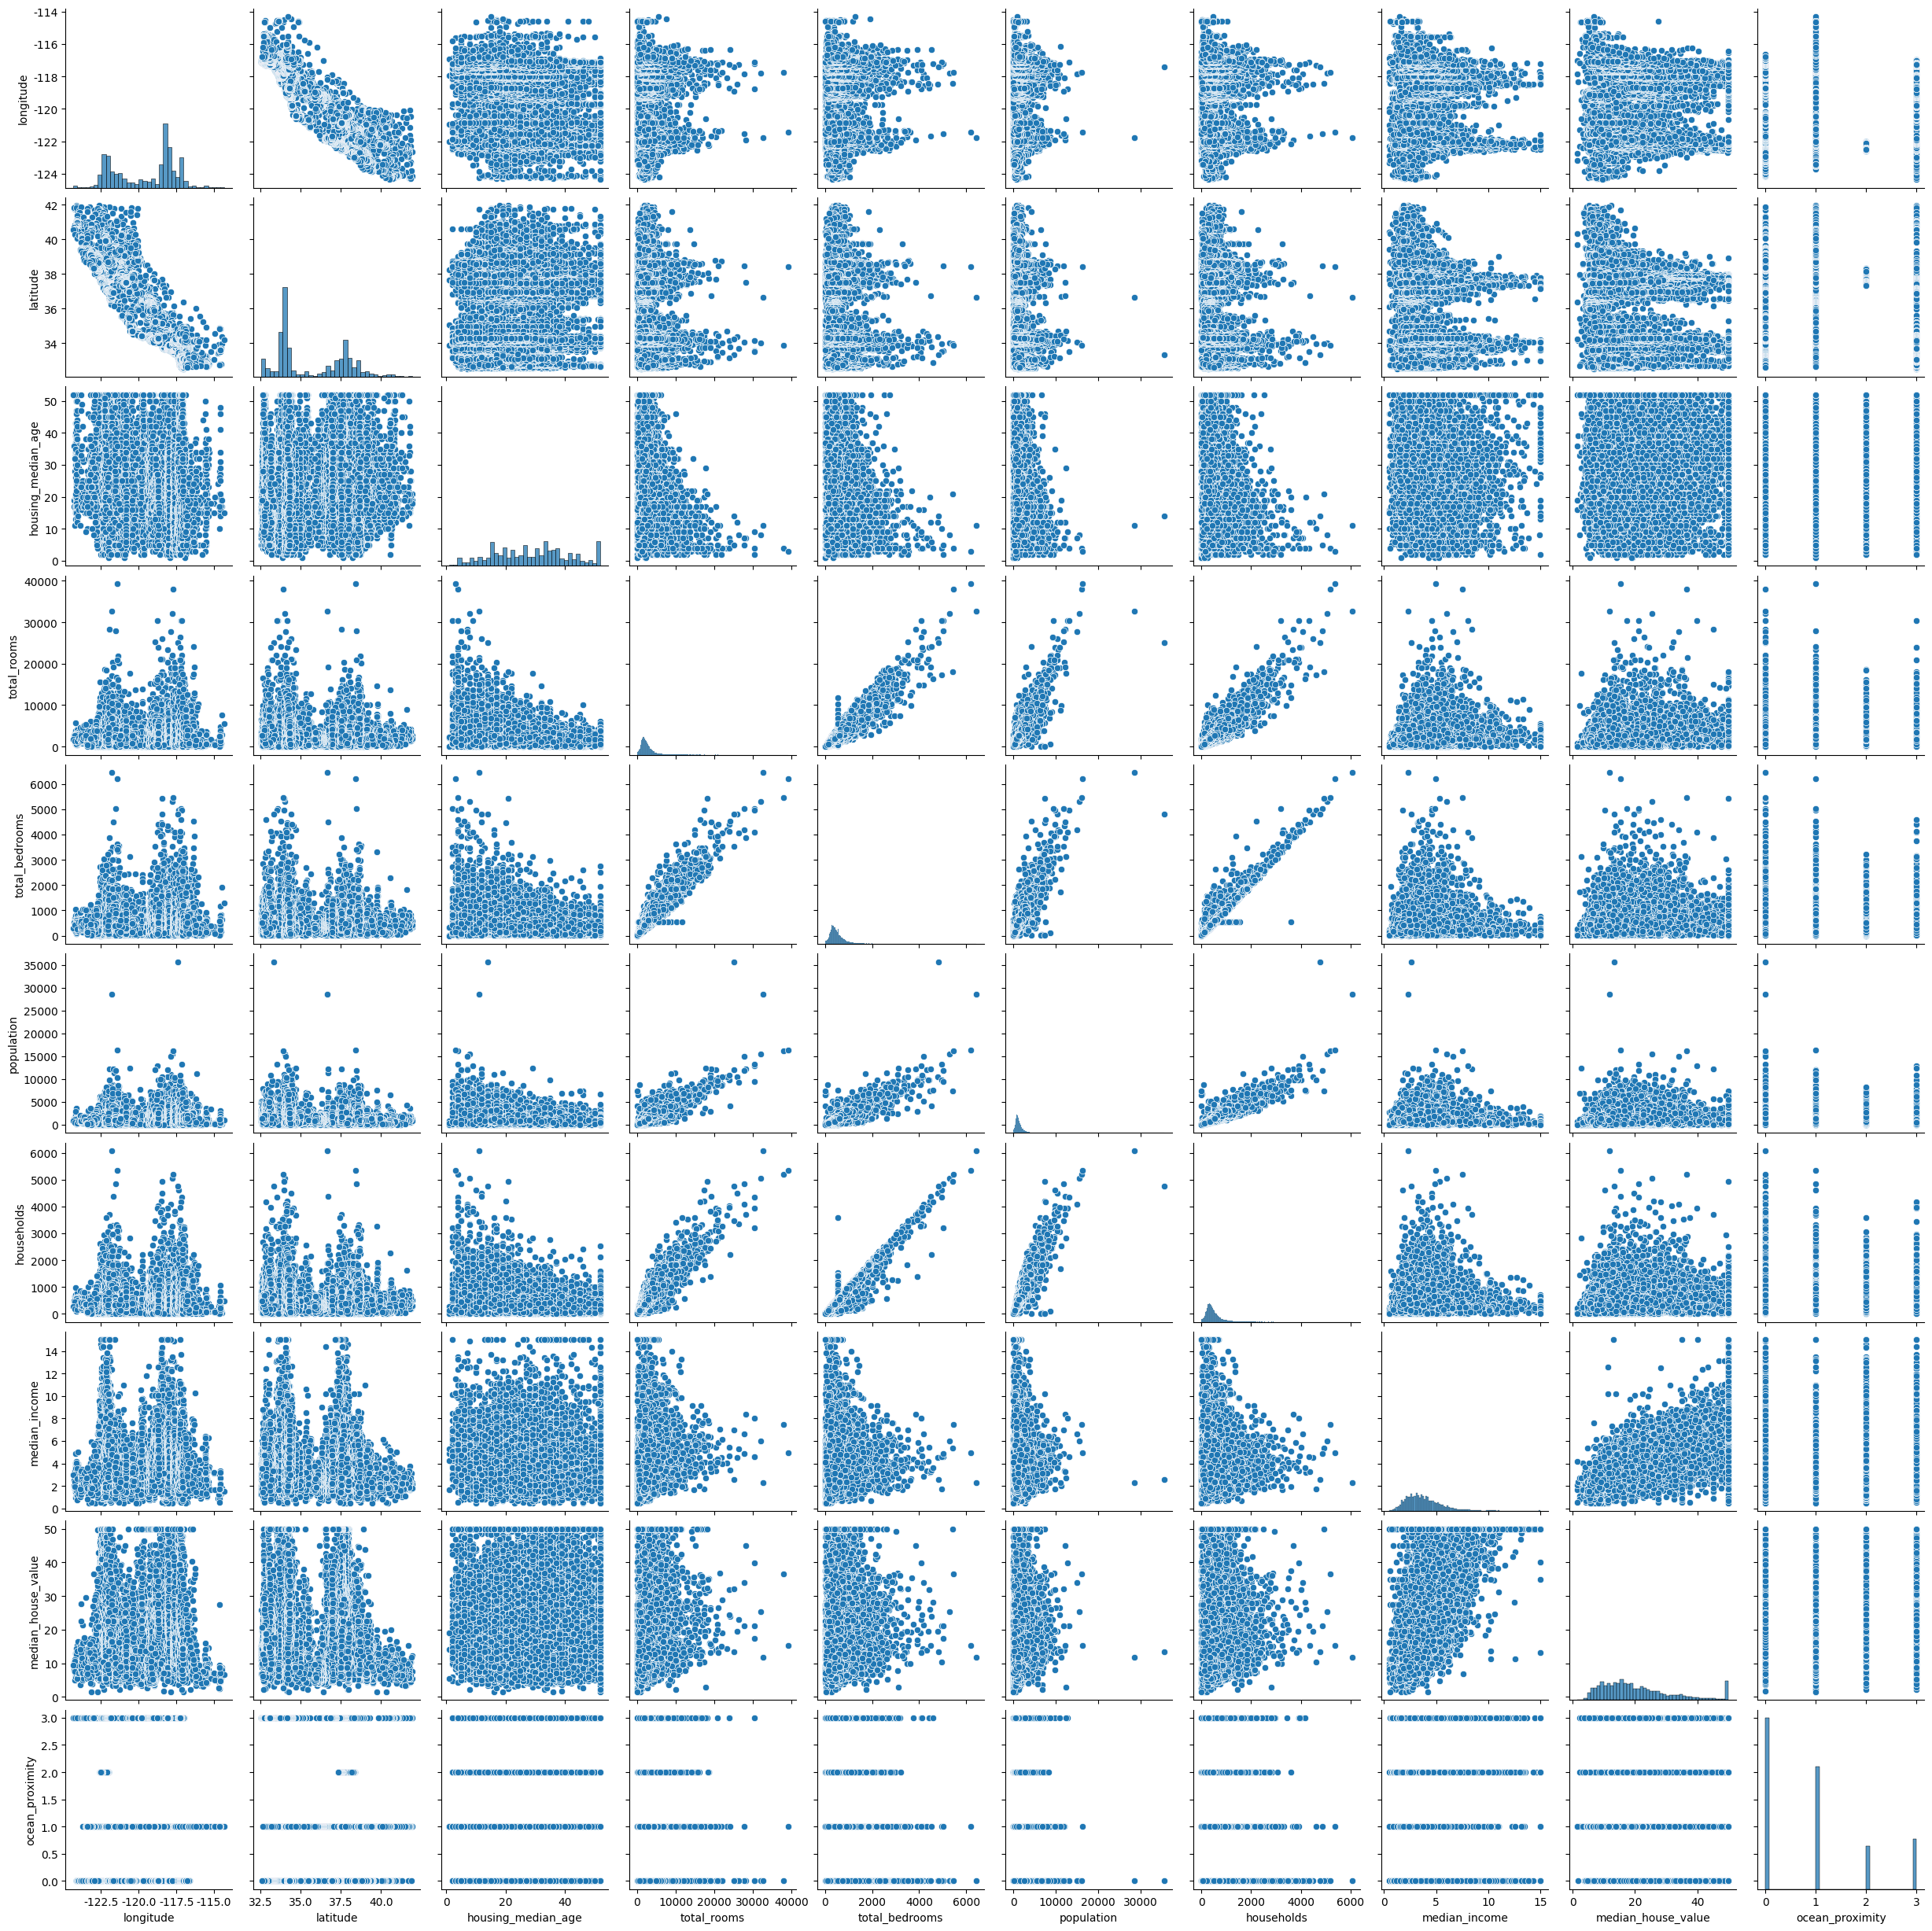

In [37]:
# Scatter plot matrix 散點圖矩陣
sns.pairplot(df)

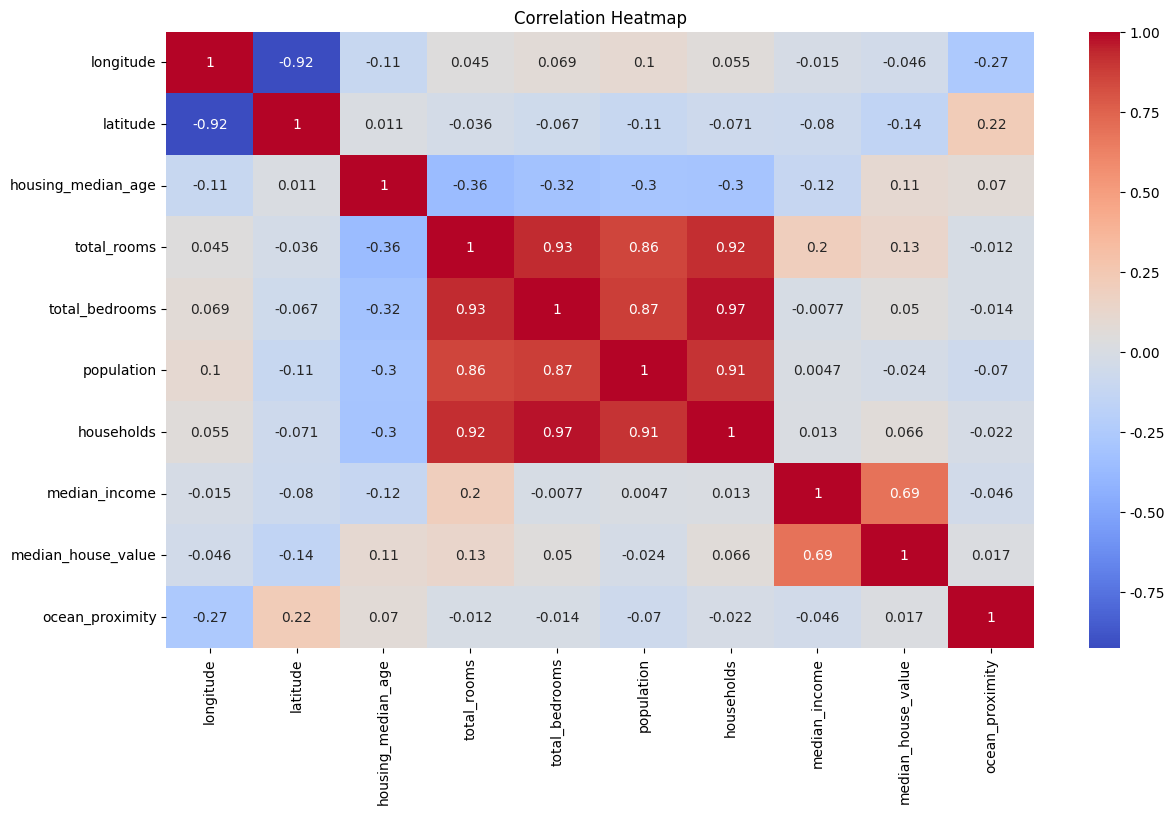

In [38]:
corr = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Train Test Split
資料分割，將資料集拆分為訓練集和測試集，針對訓練集的數值特徵做標準化然後做異常值處理(更正方式)

In [39]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (14444, 9)
X_test: (6191, 9)
y_train: (14444,)
y_test: (6191,)


In [40]:
numeric_cols = X_train.select_dtypes(include=['int','float']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols]) # 在測試集上做相同的轉換

In [41]:
X_train # 14444 rows × 9 columns

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10051      -0.71      1.69               -1.16    -8.32e-01       -9.17e-01   
6541        0.77     -0.75                0.36    -5.89e-01       -8.87e-03   
8607        0.61     -0.84               -0.04     1.35e-02        9.24e-02   
8237        0.70     -0.88                1.87    -4.93e-01        1.75e-01   
13198       0.95     -0.75               -0.28    -3.59e-01       -1.85e-01   
...          ...       ...                 ...          ...             ...   
11284       0.82     -0.87               -0.36     6.87e-01        5.69e-01   
11964       1.07     -0.78               -0.60    -9.53e-03       -2.83e-01   
5390        0.60     -0.76                0.59    -2.50e-01        6.42e-02   
860        -1.18      0.90               -1.08     4.15e-01        1.30e-01   
15795      -1.42      0.99                1.87     1.37e-01        3.32e-01   

       population  households  median_income  ocean_proximity  
10051       -0.99       -0.94          -0.40             0.08  
6541        -0.29       -0.63           0.22            -0.90  
8607        -0.17        0.07           0.13            -0.90  
8237        -0.65        0.02          -1.30             2.02  
13198       -0.32       -0.33          -0.70             0.08  
...           ...         ...            ...              ...  
11284        0.41        0.59           0.48            -0.90  
11964       -0.05       -0.25           0.20             0.08  
5390         0.28        0.06          -0.50            -0.90  
860          0.30        0.14           0.97            -0.90  
15795       -0.25        0.42           0.18             1.05  

[14444 rows x 9 columns]

In [42]:
X_train[numeric_cols].describe()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count   1.44e+04  1.44e+04            1.44e+04     1.44e+04        1.44e+04   
mean    4.85e-15  1.78e-15           -9.84e-17     9.59e-17       -1.35e-17   
std     1.00e+00  1.00e+00            1.00e+00     1.00e+00        1.00e+00   
min    -2.38e+00 -1.45e+00           -2.19e+00    -1.20e+00       -1.27e+00   
25%    -1.11e+00 -8.00e-01           -8.40e-01    -5.41e-01       -5.74e-01   
50%     5.36e-01 -6.46e-01            3.64e-02    -2.32e-01       -2.43e-01   
75%     7.85e-01  9.70e-01            6.74e-01     2.33e-01        2.52e-01   
max     2.63e+00  2.95e+00            1.87e+00     1.65e+01        1.33e+01   

       population  households  median_income  ocean_proximity  
count    1.44e+04    1.44e+04       1.44e+04         1.44e+04  
mean    -9.10e-17    4.72e-17      -3.12e-17        -8.85e-18  
std      1.00e+00    1.00e+00       1.00e+00         1.00e+00  
min     -1.25e+00   -1.29e+00      -1.78e+00        -8.97e-01  
25%     -5.63e-01   -5.76e-01      -6.87e-01        -8.97e-01  
50%     -2.30e-01   -2.37e-01      -1.79e-01         7.66e-02  
75%      2.66e-01    2.70e-01       4.66e-01         7.66e-02  
max      2.99e+01    1.25e+01       5.85e+00         2.02e+00

In [ ]:
X_test[numeric_cols].describe()

# Model

Training Set Performance:
Mean Squared Error: 47.94699364805492
R²: 0.6390308957665429


Testing Set Performance:
Mean Squared Error: 49.984943166401145
R²: 0.6262465112075836


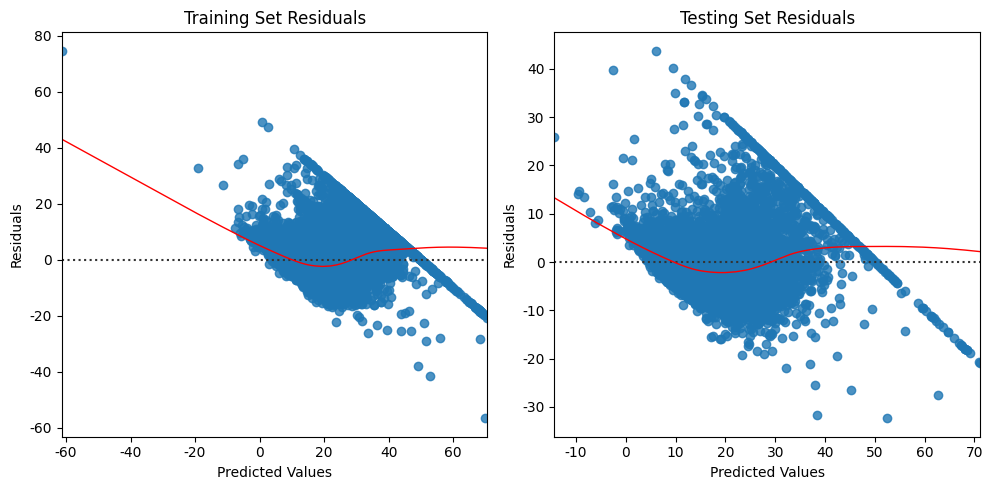

In [43]:
lr = LinearRegression()
lr.fit(X_train , y_train)
def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
  # 訓練集上的模型評分
  y_train_pred = model.predict(X_train)
  train_mse = mean_squared_error(y_train, y_train_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  print("Training Set Performance:")
  print(f"Mean Squared Error: {train_mse}")
  print(f"R²: {train_r2}")
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  sns.residplot(x=y_train_pred, y=y_train - y_train_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
  plt.xlabel("Predicted Values")
  plt.ylabel("Residuals")
  plt.title("Training Set Residuals")
  print("\n")

  # 測試集上的模型評分
  y_test_pred = model.predict(X_test)
  test_mse = mean_squared_error(y_test, y_test_pred)
  test_r2 = r2_score(y_test, y_test_pred)
  print("Testing Set Performance:")
  print(f"Mean Squared Error: {test_mse}")
  print(f"R²: {test_r2}")
  plt.subplot(1, 2, 2)
  sns.residplot(x=y_test_pred, y=y_test - y_test_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
  plt.xlabel("Predicted Values")
  plt.ylabel("Residuals")
  plt.title("Testing Set Residuals")
  plt.tight_layout()
  plt.show()
evaluate_model_performance(lr, X_train, X_test, y_train, y_test)

**MSE(均方誤差)**

所有誤差的平方和取平均，越小代表越準確。

因為對誤差取平方，較容易看出離群的預測值，此評估方式較在乎誤差的大小。

**r2_score**

判定係數，是一種衡量回歸模型表現的指標，其值範圍為[0 ,1]越接近1表示模型對數據的解釋能力越強

# 更正1
移除異常值

In [44]:
def remove_outliers(df, cols, threshold=3):
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

X_train_no_outliers = remove_outliers(pd.DataFrame(X_train, columns=numeric_cols), numeric_cols)
y_train_no_outliers = y_train[X_train_no_outliers.index]

In [45]:
X_train_no_outliers # 14444 rows × 9 columns ---> 13358 rows × 9 columns

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10051      -0.71      1.69               -1.16    -8.32e-01       -9.17e-01   
6541        0.77     -0.75                0.36    -5.89e-01       -8.87e-03   
8607        0.61     -0.84               -0.04     1.35e-02        9.24e-02   
8237        0.70     -0.88                1.87    -4.93e-01        1.75e-01   
13198       0.95     -0.75               -0.28    -3.59e-01       -1.85e-01   
...          ...       ...                 ...          ...             ...   
11284       0.82     -0.87               -0.36     6.87e-01        5.69e-01   
11964       1.07     -0.78               -0.60    -9.53e-03       -2.83e-01   
5390        0.60     -0.76                0.59    -2.50e-01        6.42e-02   
860        -1.18      0.90               -1.08     4.15e-01        1.30e-01   
15795      -1.42      0.99                1.87     1.37e-01        3.32e-01   

       population  households  median_income  ocean_proximity  
10051       -0.99       -0.94          -0.40             0.08  
6541        -0.29       -0.63           0.22            -0.90  
8607        -0.17        0.07           0.13            -0.90  
8237        -0.65        0.02          -1.30             2.02  
13198       -0.32       -0.33          -0.70             0.08  
...           ...         ...            ...              ...  
11284        0.41        0.59           0.48            -0.90  
11964       -0.05       -0.25           0.20             0.08  
5390         0.28        0.06          -0.50            -0.90  
860          0.30        0.14           0.97            -0.90  
15795       -0.25        0.42           0.18             1.05  

[13358 rows x 9 columns]

Training Set Performance:
Mean Squared Error: 43.81267253607124
R²: 0.6435790757654155


Testing Set Performance:
Mean Squared Error: 54.21970844427835
R²: 0.5945818098683313


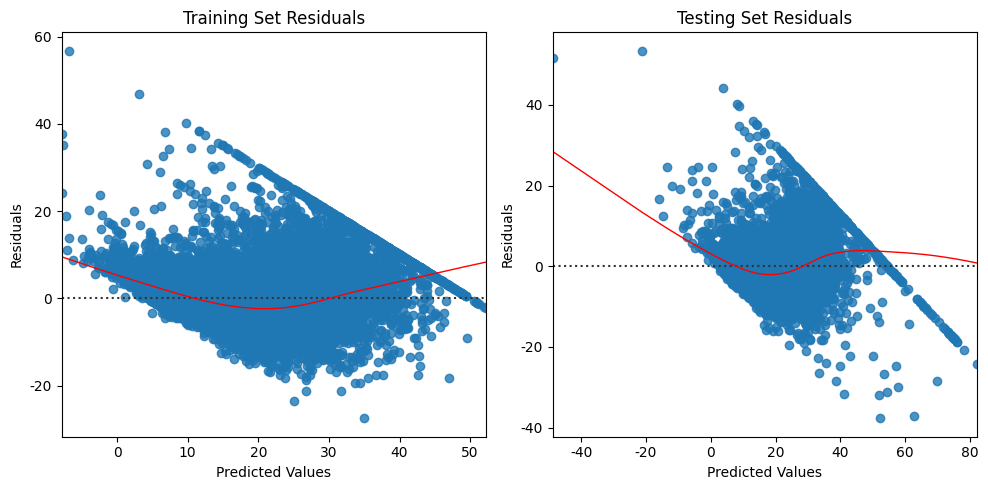

In [30]:
lr2 = LinearRegression()
lr2.fit(X_train_no_outliers ,y_train_no_outliers)
evaluate_model_performance(lr2, X_train_no_outliers, X_test, y_train_no_outliers, y_test)

Training Set Performance:
Mean Squared Error: 51.05749740776709
R²: 0.615613457666049


Testing Set Performance:
Mean Squared Error: 53.07368841829934
R²: 0.6031509700154123


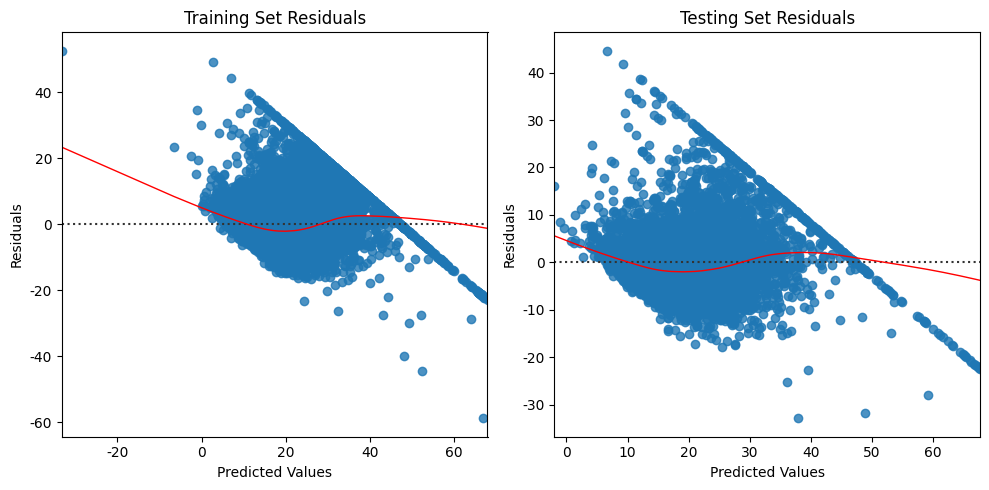

In [23]:
elanet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elanet.fit(X_train , y_train)
evaluate_model_performance(elanet, X_train, X_test, y_train, y_test)

Training Set Performance:
Mean Squared Error: 48.6975837438939
R²: 0.603839784215406


Testing Set Performance:
Mean Squared Error: 52.848649234111384
R²: 0.6048336603392813


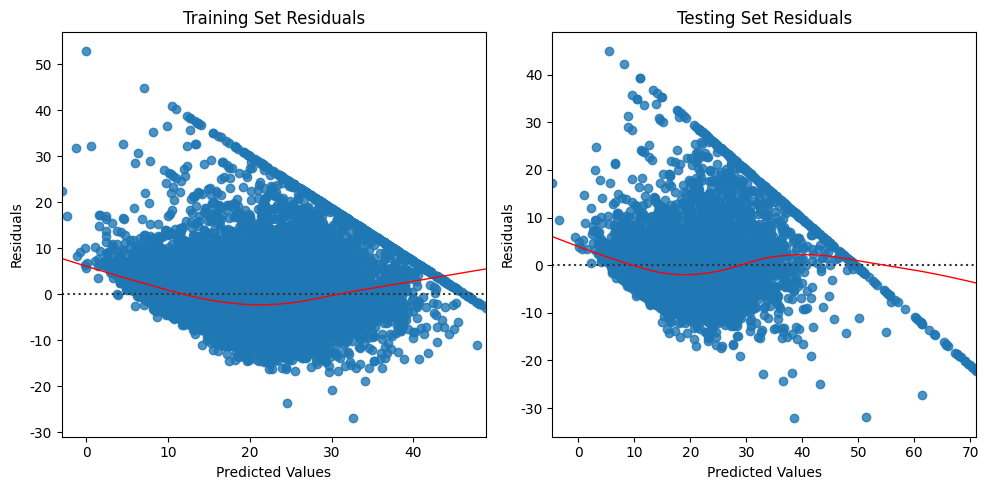

In [32]:
elanet2 = ElasticNet(alpha=0.1, l1_ratio=0.5)
elanet2.fit(X_train_no_outliers, y_train_no_outliers)
evaluate_model_performance(elanet2, X_train_no_outliers, X_test, y_train_no_outliers, y_test)

Training Set Performance:
Mean Squared Error: 7.641704727734142
R²: 0.9424694000496803


Testing Set Performance:
Mean Squared Error: 24.057882768047595
R²: 0.8201114766184071


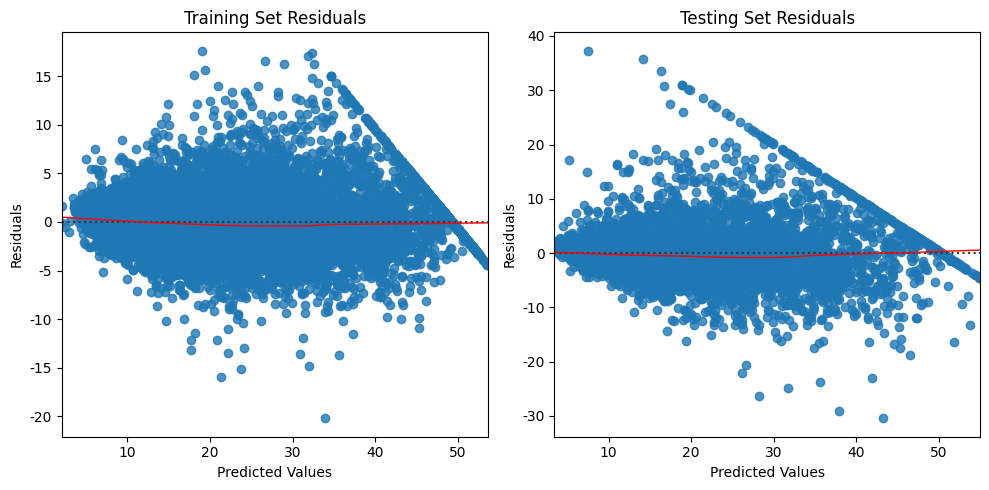

In [19]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
evaluate_model_performance(xgb_model, X_train, X_test, y_train, y_test)

Training Set Performance:
Mean Squared Error: 7.179949418114641
R²: 0.9415903194342897


Testing Set Performance:
Mean Squared Error: 23.67362250917457
R²: 0.8229847141027423


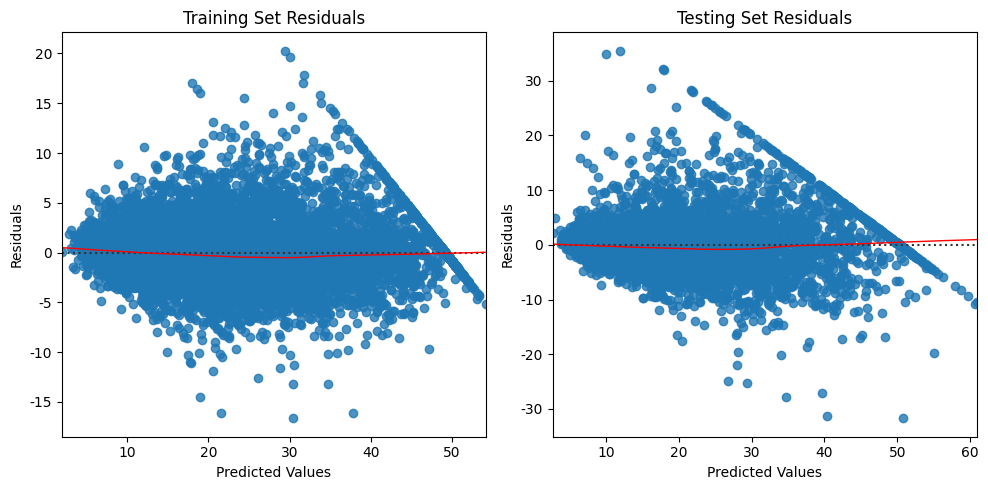

In [17]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_no_outliers, y_train_no_outliers)
evaluate_model_performance(xgb_model, X_train_no_outliers, X_test, y_train_no_outliers, y_test)

In [ ]:
# xgb_model = XGBRegressor(random_state=42)
# xgb_model.fit(X_train, y_train)
# def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
#   # 訓練集上的模型評分
#   y_train_pred = model.predict(X_train)
#   train_mse = mean_squared_error(y_train, y_train_pred)
#   train_r2 = r2_score(y_train, y_train_pred)
#   print("Training Set Performance:")
#   print(f"Mean Squared Error: {train_mse}")
#   print(f"R²: {train_r2}")
#   print("\n")

#   # 測試集上的模型評分
#   y_test_pred = model.predict(X_test)
#   test_mse = mean_squared_error(y_test, y_test_pred)
#   test_r2 = r2_score(y_test, y_test_pred)
#   print("Testing Set Performance:")
#   print(f"Mean Squared Error: {test_mse}")
#   print(f"R²: {test_r2}")
#   plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
#   plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
#   plt.xlabel('Predicted values')
#   plt.ylabel('Residuals')
#   plt.legend(loc='upper left')
#   plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
#   plt.xlim([-10, 50])
#   plt.tight_layout()
#   plt.show()
# evaluate_model_performance(xgb_model, X_train, X_test, y_train, y_test)